## C1. Plot and save all water masks

In [1]:
from os import listdir
from os.path import isfile, join
import numpy as np
import seaborn as sns

# EOLearn libraries:
from eolearn.core import EOTask, EOPatch, LinearWorkflow, LoadTask, SaveTask, FeatureType, EOExecutor
from eolearn.core import OverwritePermission

# Add to python path parent dictionary
import sys
sys.path.append("../../")

# load site dependant constants (HERE YOU CAN CHOOSE DIFFERENT LOCATION)
from aoi_sites import upe_promice_area as site

# load utility functions
from utils import io_functions as io_utils
from utils import plot_functions as plot_utils

### 0. Choose patch to analyze

In [2]:
eo_patch_no = 0

if eo_patch_no == 0:
    
    # 0. eopatch with nice supraglacial features in a flat snow/ice area
    CHOSEN_DATE_RANGE = site.DATE_RANGES_LANDSAT_8[6]
    DATETIME_ID = 10
    EO_PATCH_NAME = '3176_maxcc_0.05_x-5_y-134'
    
elif eo_patch_no == 1:
    
    # 1.
    CHOSEN_DATE_RANGE = site.DATE_RANGES_LANDSAT_8[1]
    DATETIME_ID = 2
    EO_PATCH_NAME = '2969_maxcc_0.05_x-3_y-130'
    
elif eo_patch_no == 2:
    
    # 2.
    CHOSEN_DATE_RANGE = site.DATE_RANGES_LANDSAT_8[0]
    DATETIME_ID = 1
    EO_PATCH_NAME = '2969_maxcc_0.05_x-3_y-130'
    
elif eo_patch_no == 3:
        
    # 3.
    CHOSEN_DATE_RANGE = site.DATE_RANGES_LANDSAT_8[6]
    DATETIME_ID = 6
    EO_PATCH_NAME = '2969_maxcc_0.05_x-3_y-130'
    
else : print('No such an index!')
    

NameError: name 'site' is not defined

### 1. Set cloud data to display

In [60]:
# False:only display True: save and display 
SAVE = True

PLOT_FOLDER = './plots/water_mask_comparison'

LIST_OF_RGB_DATA_TO_PLOT = [ 'LANDSAT_RAW_BANDS' ]
LIST_OF_DATA_MASK_TO_PLOT = [ 'LANDSAT_NDWI','LANDSAT_NDWI_ICE' ]

LIST_OD_MASKS_TO_PLOT = ['WATER_MASK_ST_030','WATER_MASK_ST_025',
                         'WATER_MASK_ST_020','WATER_MASK_ST_015',
                         'WATER_MASK_ST_010','WATER_MASK_ICE_ST_030',
                         'WATER_MASK_ICE_ST_025','WATER_MASK_ICE_ST_020'
                         ,'WATER_MASK_ICE_ST_015','WATER_MASK_ICE_ST_010']

#PATCH_FILEPATH = io_utils.get_eopatches_dir(site.DATA_PRODUCTS[1], site.SITE_NAME, site.AVAILABLE_CRSs[0], CHOSEN_DATE_RANGE)
#PATCH_FILEPATH

'../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2019_05-2019_10/'

### 1. Load eo_patch

In [61]:
eo_patch = EOPatch.load(PATCH_FILEPATH+EO_PATCH_NAME)
eo_patch

EOPatch(
  data: {
    LANDSAT_EUC_NORM_RAW_BANDS: numpy.ndarray(shape=(31, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI: numpy.ndarray(shape=(31, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_GREEN_NIR: numpy.ndarray(shape=(31, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_ICE: numpy.ndarray(shape=(31, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_NIR_SWIR_1: numpy.ndarray(shape=(31, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_NIR_SWIR_2: numpy.ndarray(shape=(31, 333, 333, 1), dtype=float32)
    LANDSAT_QA_LAYERS: numpy.ndarray(shape=(31, 333, 333, 5), dtype=float32)
    LANDSAT_RAW_BANDS: numpy.ndarray(shape=(31, 333, 333, 11), dtype=float32)
    MODIS_EUC_NORM_RAW_BANDS: numpy.ndarray(shape=(31, 333, 333, 1), dtype=float32)
    MODIS_NDWI: numpy.ndarray(shape=(31, 333, 333, 1), dtype=float32)
    MODIS_NRB: numpy.ndarray(shape=(31, 333, 333, 1), dtype=float32)
    MODIS_RAW_BANDS_DAY_0: numpy.ndarray(shape=(31, 333, 333, 7), dtype=float32)
    MODIS_RAW_BANDS_DAY_AFTER: numpy.nda

### 2. PLot images from the lists

2019-07-01 00:01:00
Ploting...
Saved: 3176_2019_10_LANDSAT_RAW_BANDS.png


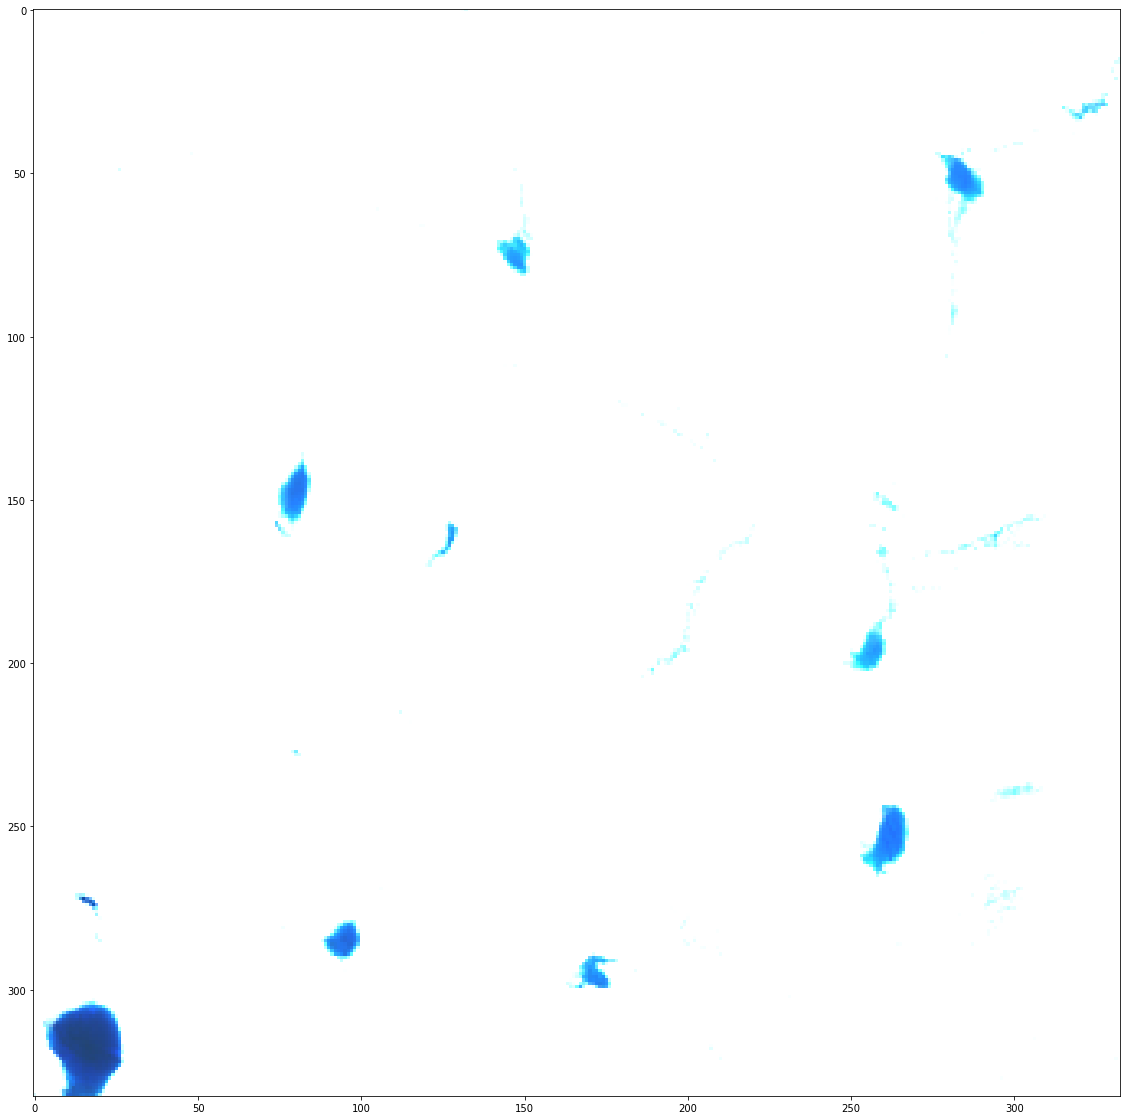

In [62]:
#Plotting GRB picture with water features
#DATETIME_ID = 21
for data_acces_name in LIST_OF_RGB_DATA_TO_PLOT:
    plot_utils.plot_RGB_LANDSAT_8_image(eo_patch, data_acces_name=data_acces_name, datetime_idx=DATETIME_ID, save=SAVE)

2019-07-01 00:01:00
Saved: 3176_2019_10_LANDSAT_NDWI.png
2019-07-01 00:01:00
Saved: 3176_2019_10_LANDSAT_NDWI_ICE.png


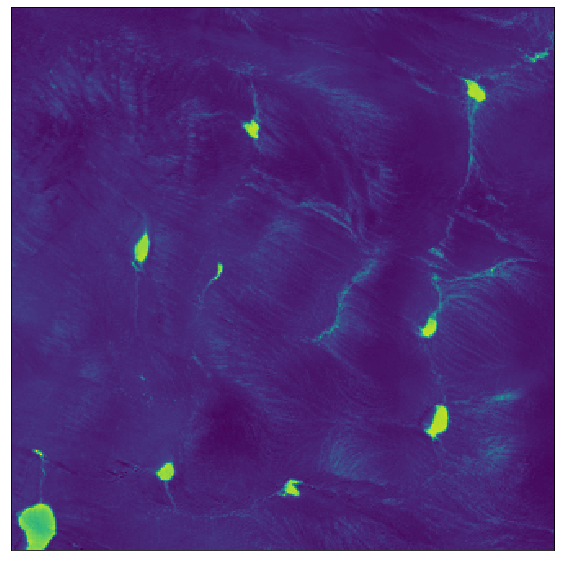

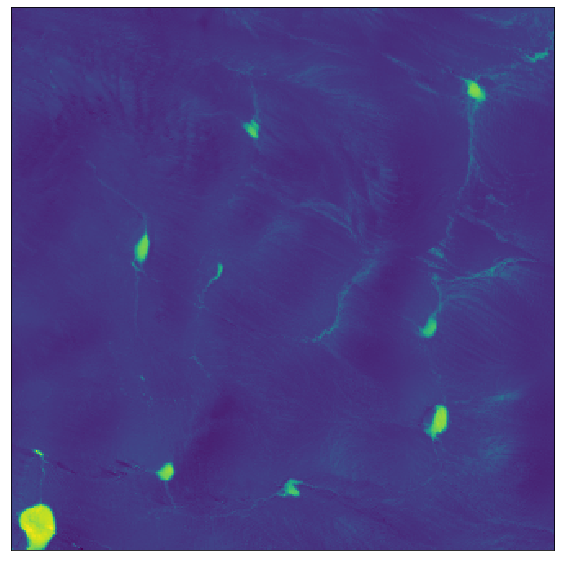

In [63]:
#Plotting NDWI band and NDWI_ICE band
for data_acces_name in LIST_OF_DATA_MASK_TO_PLOT:
    plot_utils.plot_single_band_LANDSAT_8(eo_patch, band_idx = 0, data_acces_name=data_acces_name, datetime_idx=DATETIME_ID, save=SAVE)

2019-07-01 00:01:00
Saved: 3176_2019_10_WATER_MASK_ST_030.png
2019-07-01 00:01:00
Saved: 3176_2019_10_WATER_MASK_ST_025.png
2019-07-01 00:01:00
Saved: 3176_2019_10_WATER_MASK_ST_020.png
2019-07-01 00:01:00
Saved: 3176_2019_10_WATER_MASK_ST_015.png
2019-07-01 00:01:00
Saved: 3176_2019_10_WATER_MASK_ST_010.png
2019-07-01 00:01:00
Saved: 3176_2019_10_WATER_MASK_ICE_ST_030.png
2019-07-01 00:01:00
Saved: 3176_2019_10_WATER_MASK_ICE_ST_025.png
2019-07-01 00:01:00
Saved: 3176_2019_10_WATER_MASK_ICE_ST_020.png
2019-07-01 00:01:00
Saved: 3176_2019_10_WATER_MASK_ICE_ST_015.png
2019-07-01 00:01:00
Saved: 3176_2019_10_WATER_MASK_ICE_ST_010.png


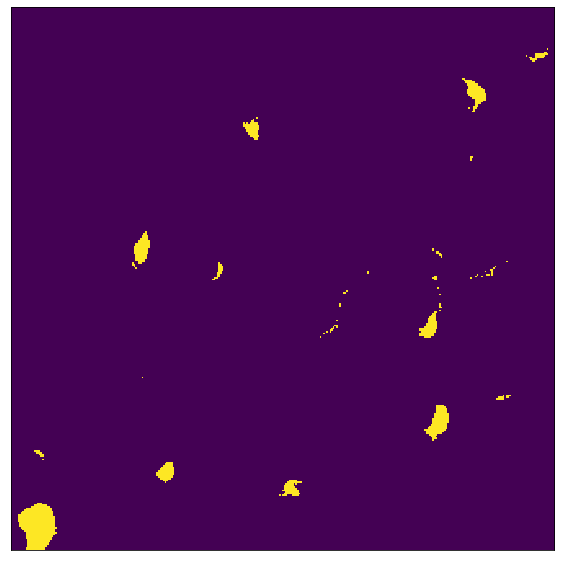

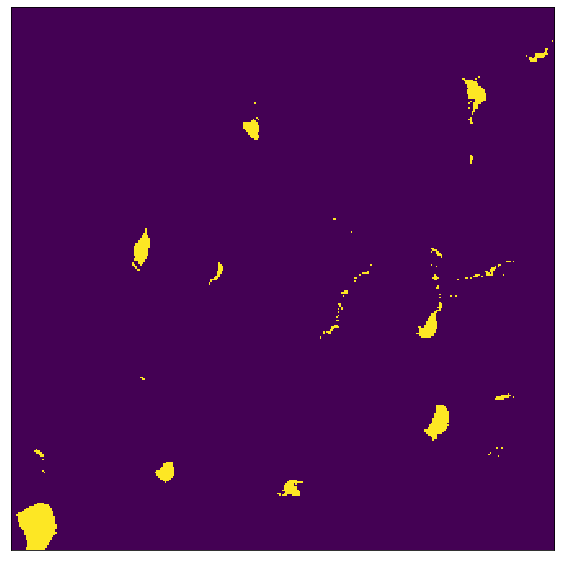

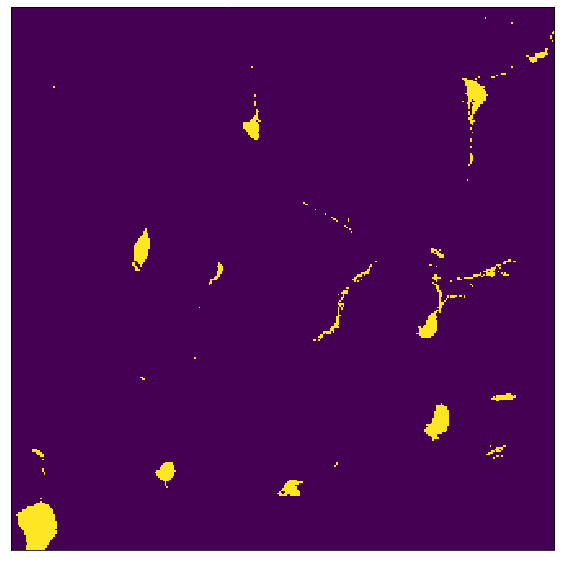

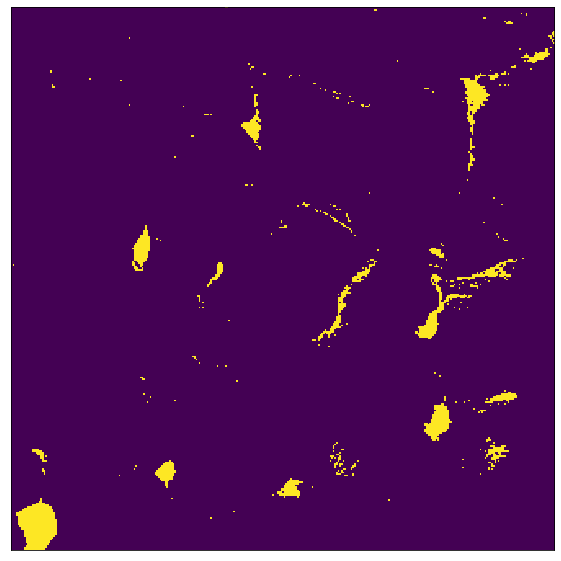

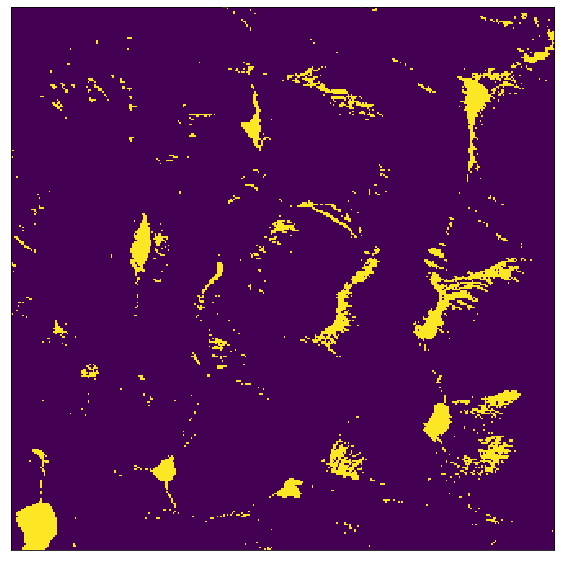

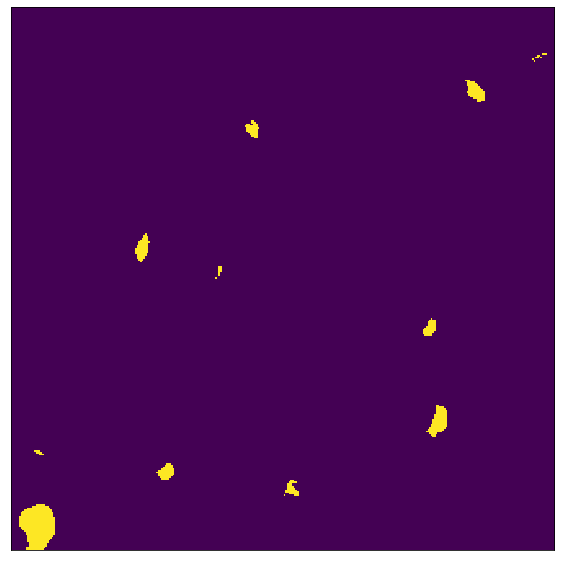

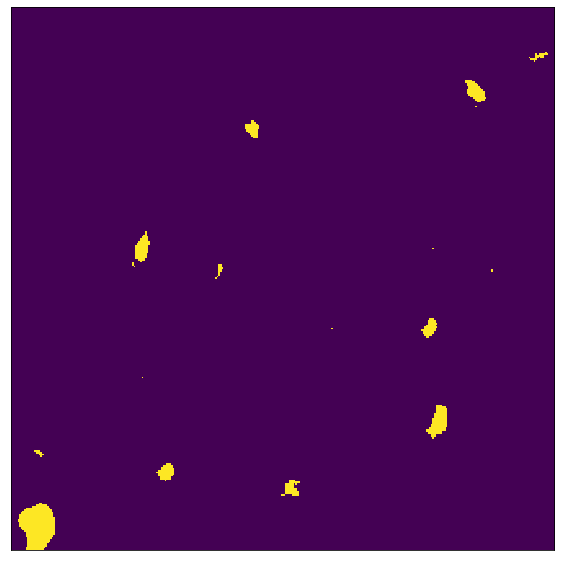

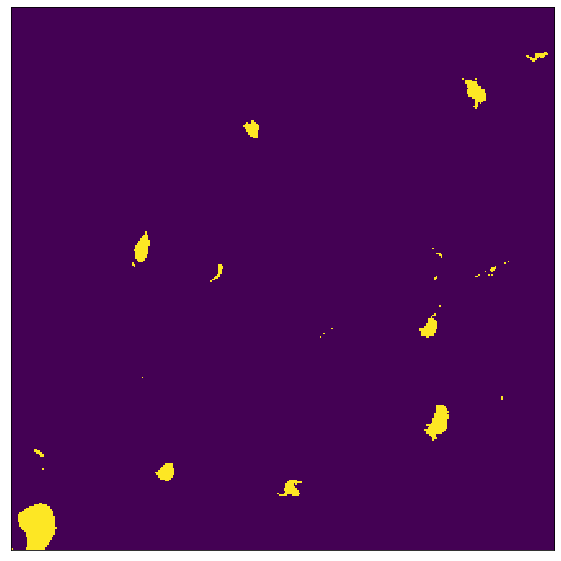

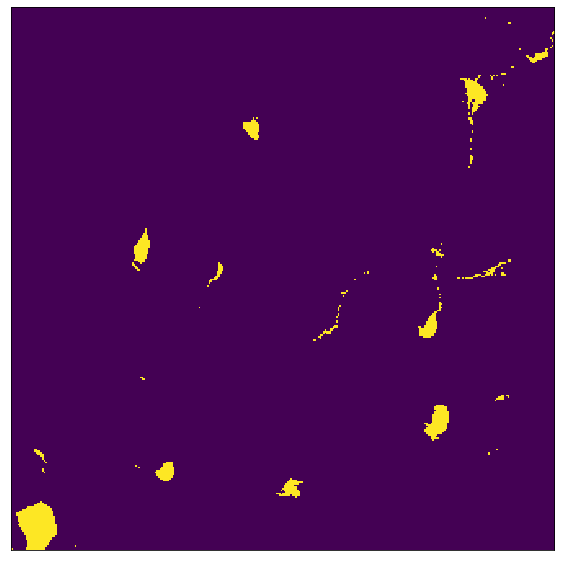

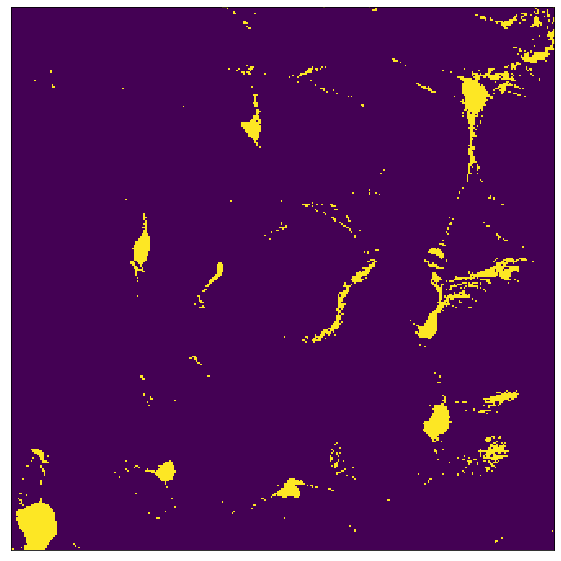

In [64]:
#Plotting different simple threshold water masks on both produced from NDWI, NDWI_ICE band for sanity check:
for data_acces_name in LIST_OD_MASKS_TO_PLOT:
    plot_utils.plot_single_mask_LANDSAT_8(eo_patch, band_idx = 0, data_acces_name=data_acces_name, datetime_idx=DATETIME_ID, save=SAVE)
    

Sanity check: Decited to go with regular NDWI - with threshold 0.25. Red/Blue band is not applicable without ice/snow mask applicaion in front, (suggested to use with GIMP masking project). Regular NDWI has better distribution and works way better in places without snow. 